## Cleaning columns

In [1]:
import os, sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Add config_local to sys.path
local_config_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'config_local'))
if local_config_path not in sys.path:
    sys.path.insert(0, local_config_path)

import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

In [2]:
train = pd.read_csv(local_config.TRAIN_CSV)
test  = pd.read_csv(local_config.TEST_CSV)

print(f"Train shape: {train.shape}  |  Test shape: {test.shape}")
display(train.head(3))

Train shape: (1460, 81)  |  Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
train = pd.read_csv(local_config.TRAIN_CSV)
test  = pd.read_csv(local_config.TEST_CSV)

print(f"Train shape: {train.shape}  |  Test shape: {test.shape}")
display(train.head(3))

Train shape: (1460, 81)  |  Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Missing values

In [4]:
def fill_missing_with_none_or_zero(df):
    df = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0)       # e.g. no garage = 0 area
        else:
            df[col] = df[col].fillna("None")  # e.g. no alley = "None"
    return df


missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [5]:
train_filled = fill_missing_with_none_or_zero(train)
test_filled = fill_missing_with_none_or_zero(test)

train_filled.to_csv(__import__("pathlib").Path(local_config.TRAIN_CSV).resolve().parent / "train_filled.csv", index=False)
test_filled.to_csv(__import__("pathlib").Path(local_config.TEST_CSV).resolve().parent / "test_filled.csv", index=False)

In [6]:
def summarize_columns(df, max_unique=15):
    summary = {}
    for col in df.columns:
        col_type = df[col].dtype
        uniques = df[col].dropna().unique()
        n_unique = len(uniques)

        if pd.api.types.is_numeric_dtype(df[col]):
            if n_unique <= max_unique:
                summary[col] = {
                    "type": "numeric (discrete)",
                    "unique_values": sorted(uniques)
                }
            else:
                summary[col] = {
                    "type": "numeric (continuous)",
                    "unique_values": f"{n_unique} unique values"
                }
        else:
            if n_unique <= max_unique:
                summary[col] = {
                    "type": "categorical",
                    "unique_values": uniques.tolist()
                }
            else:
                summary[col] = {
                    "type": "categorical",
                    "unique_values": f"{n_unique} unique values"
                }
    return pd.DataFrame(summary).T

# Usage
feature_summary = summarize_columns(train_filled)
display(feature_summary.head(20))

#feature_summary.to_csv(__import__("pathlib").Path(local_config.TRAIN_CSV).resolve().parent / "feature_summary.csv", index=True)

,type,unique_values
Id,numeric (continuous),1460 unique values
MSSubClass,numeric (discrete),"[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 1..."
MSZoning,categorical,"[RL, RM, C (all), FV, RH]"
LotFrontage,numeric (continuous),111 unique values
LotArea,numeric (continuous),1073 unique values
Street,categorical,"[Pave, Grvl]"
Alley,categorical,"[None, Grvl, Pave]"
LotShape,categorical,"[Reg, IR1, IR2, IR3]"
LandContour,categorical,"[Lvl, Bnk, Low, HLS]"
Utilities,categorical,"[AllPub, NoSeWa]"


# Computes corrolation of numeric columns

In [7]:
num_df = train_filled.select_dtypes(include="number") #38 columns
aNum_df = train_filled.select_dtypes(exclude="number") #43 columns

In [8]:
corr = num_df.corr()

# upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

reduced_df = num_df.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns: {to_drop}")
print(f"Reduced shape: {reduced_df.shape}")

Dropped 0 columns: []
Reduced shape: (1460, 38)


In [9]:
cat_df = pd.get_dummies(aNum_df, drop_first=False, dtype="int8")

In [10]:
# 1) One-hot with explicit separator
aNum_df = train_filled.select_dtypes(exclude="number").copy()
cat_df  = pd.get_dummies(aNum_df, drop_first=True, dtype="int8", prefix_sep="=")

corr_cat = cat_df.corr()

# upper triangle of correlation matrix
upper_cat = corr_cat.where(np.triu(np.ones(corr_cat.shape), k=1).astype(bool))

# find features with correlation > 0.9
to_drop_cat = [column for column in upper_cat.columns if any(upper_cat[column].abs() > 0.9)]

reduced_df_cat = cat_df.drop(columns=to_drop_cat)
print(f"Dropped {len(to_drop_cat)} columns: {to_drop_cat}")
print(f"Reduced shape: {reduced_df_cat.shape}")

Dropped 15 columns: ['RoofStyle=Hip', 'Exterior2nd=CBlock', 'Exterior2nd=CmentBd', 'Exterior2nd=MetalSd', 'Exterior2nd=VinylSd', 'ExterQual=TA', 'BsmtCond=None', 'BsmtExposure=None', 'BsmtFinType1=None', 'BsmtFinType2=None', 'GarageFinish=None', 'GarageQual=None', 'GarageCond=None', 'MiscFeature=Shed', 'SaleCondition=Partial']
Reduced shape: (1460, 209)


In [11]:
corr_cat = cat_df.corr().abs()
upper_cat = corr_cat.where(np.triu(np.ones(corr_cat.shape), k=1).astype(bool))


In [12]:
drops = []

for col in upper_cat.columns:
    high_corr = upper_cat[col][upper_cat[col] > 0.9].index.tolist()
    for partner in high_corr:
        drops.append((col, partner, upper_cat.loc[partner, col]))

# Now make a DataFrame of what we’ll drop
drop_summary = pd.DataFrame(drops, columns=["Column_to_Drop", "Correlated_With", "Correlation"])
drop_summary = drop_summary.sort_values("Correlation", ascending=False).reset_index(drop=True)

# List of columns to actually drop
to_drop_cat = drop_summary["Column_to_Drop"].unique().tolist()

Lets do a Chi squarred statistic test on non categorial variable

Null hypothgsis : the 2 categorial variables are independant

🔹 p-value ≠ probability H₀ is true/false 

🔹 It = probability of getting data this extreme if H₀ were true

🔹 Small p → data is unlikely under H₀ → evidence against H₀

🔹 Large p → data fits H₀ fine → no evidence against H₀

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import sklearn

# --- params ---
THRESHOLD = 0.90  # tune this (0.85~0.95 typical)

# 1) Select non-numeric (categorical) columns
cat_cols = train_filled.select_dtypes(exclude="number").columns.tolist()
cat_df   = train_filled[cat_cols]

# 2) One-hot encode with sklearn 1.7.1 (uses sparse_output)
encoder = OneHotEncoder(drop=None, sparse_output=False, dtype=np.int8, handle_unknown="ignore")
dummy_mat = encoder.fit_transform(cat_df)        # shape: (n_samples, n_dummies)
dummy_cols = encoder.get_feature_names_out(cat_cols)
dummy_df = pd.DataFrame(dummy_mat, columns=dummy_cols, index=train_filled.index)

# 3) Compute dummy-level absolute correlation
# (Pearson on 0/1 indicators is fine to detect near-duplicates)
corr_dummy = dummy_df.corr().abs()

# 4) Collapse to original column-level association:
# For each pair of original categorical columns (A,B),
# take the MAX absolute correlation across their dummy columns.
# This yields a feature-by-feature association matrix like df.corr()
col_spans = {}
start = 0
for col, cats in zip(encoder.feature_names_in_, encoder.categories_):
    width = len(cats)
    col_spans[col] = (start, start + width)   # [start, end)
    start += width

cols = list(col_spans.keys())
n = len(cols)
assoc = pd.DataFrame(np.eye(n), index=cols, columns=cols, dtype=float)

for i, ci in enumerate(cols):
    si, ei = col_spans[ci]
    block_i = slice(si, ei)
    for j in range(i+1, n):
        cj = cols[j]
        sj, ej = col_spans[cj]
        block_j = slice(sj, ej)
        # take the maximum correlation between any dummy of ci and any dummy of cj
        max_corr = corr_dummy.iloc[block_i, block_j].to_numpy().max()
        assoc.iat[i, j] = max_corr
        assoc.iat[j, i] = max_corr

# 5) Pick columns to drop using the standard "upper triangle" trick
upper = assoc.where(np.triu(np.ones_like(assoc, dtype=bool), k=1))
to_drop_cats = [c for c in upper.columns if (upper[c] > THRESHOLD).any()]

print(f"Categorical columns to drop (threshold={THRESHOLD}):", to_drop_cats)

# 6) Drop from the ORIGINAL dataframe (only whole categorical columns)
train_clean = train_filled.drop(columns=to_drop_cats)

# Optional: keep the matrix to inspect
cat_corr_matrix = assoc


Categorical columns to drop (threshold=0.9): ['Exterior2nd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleCondition']


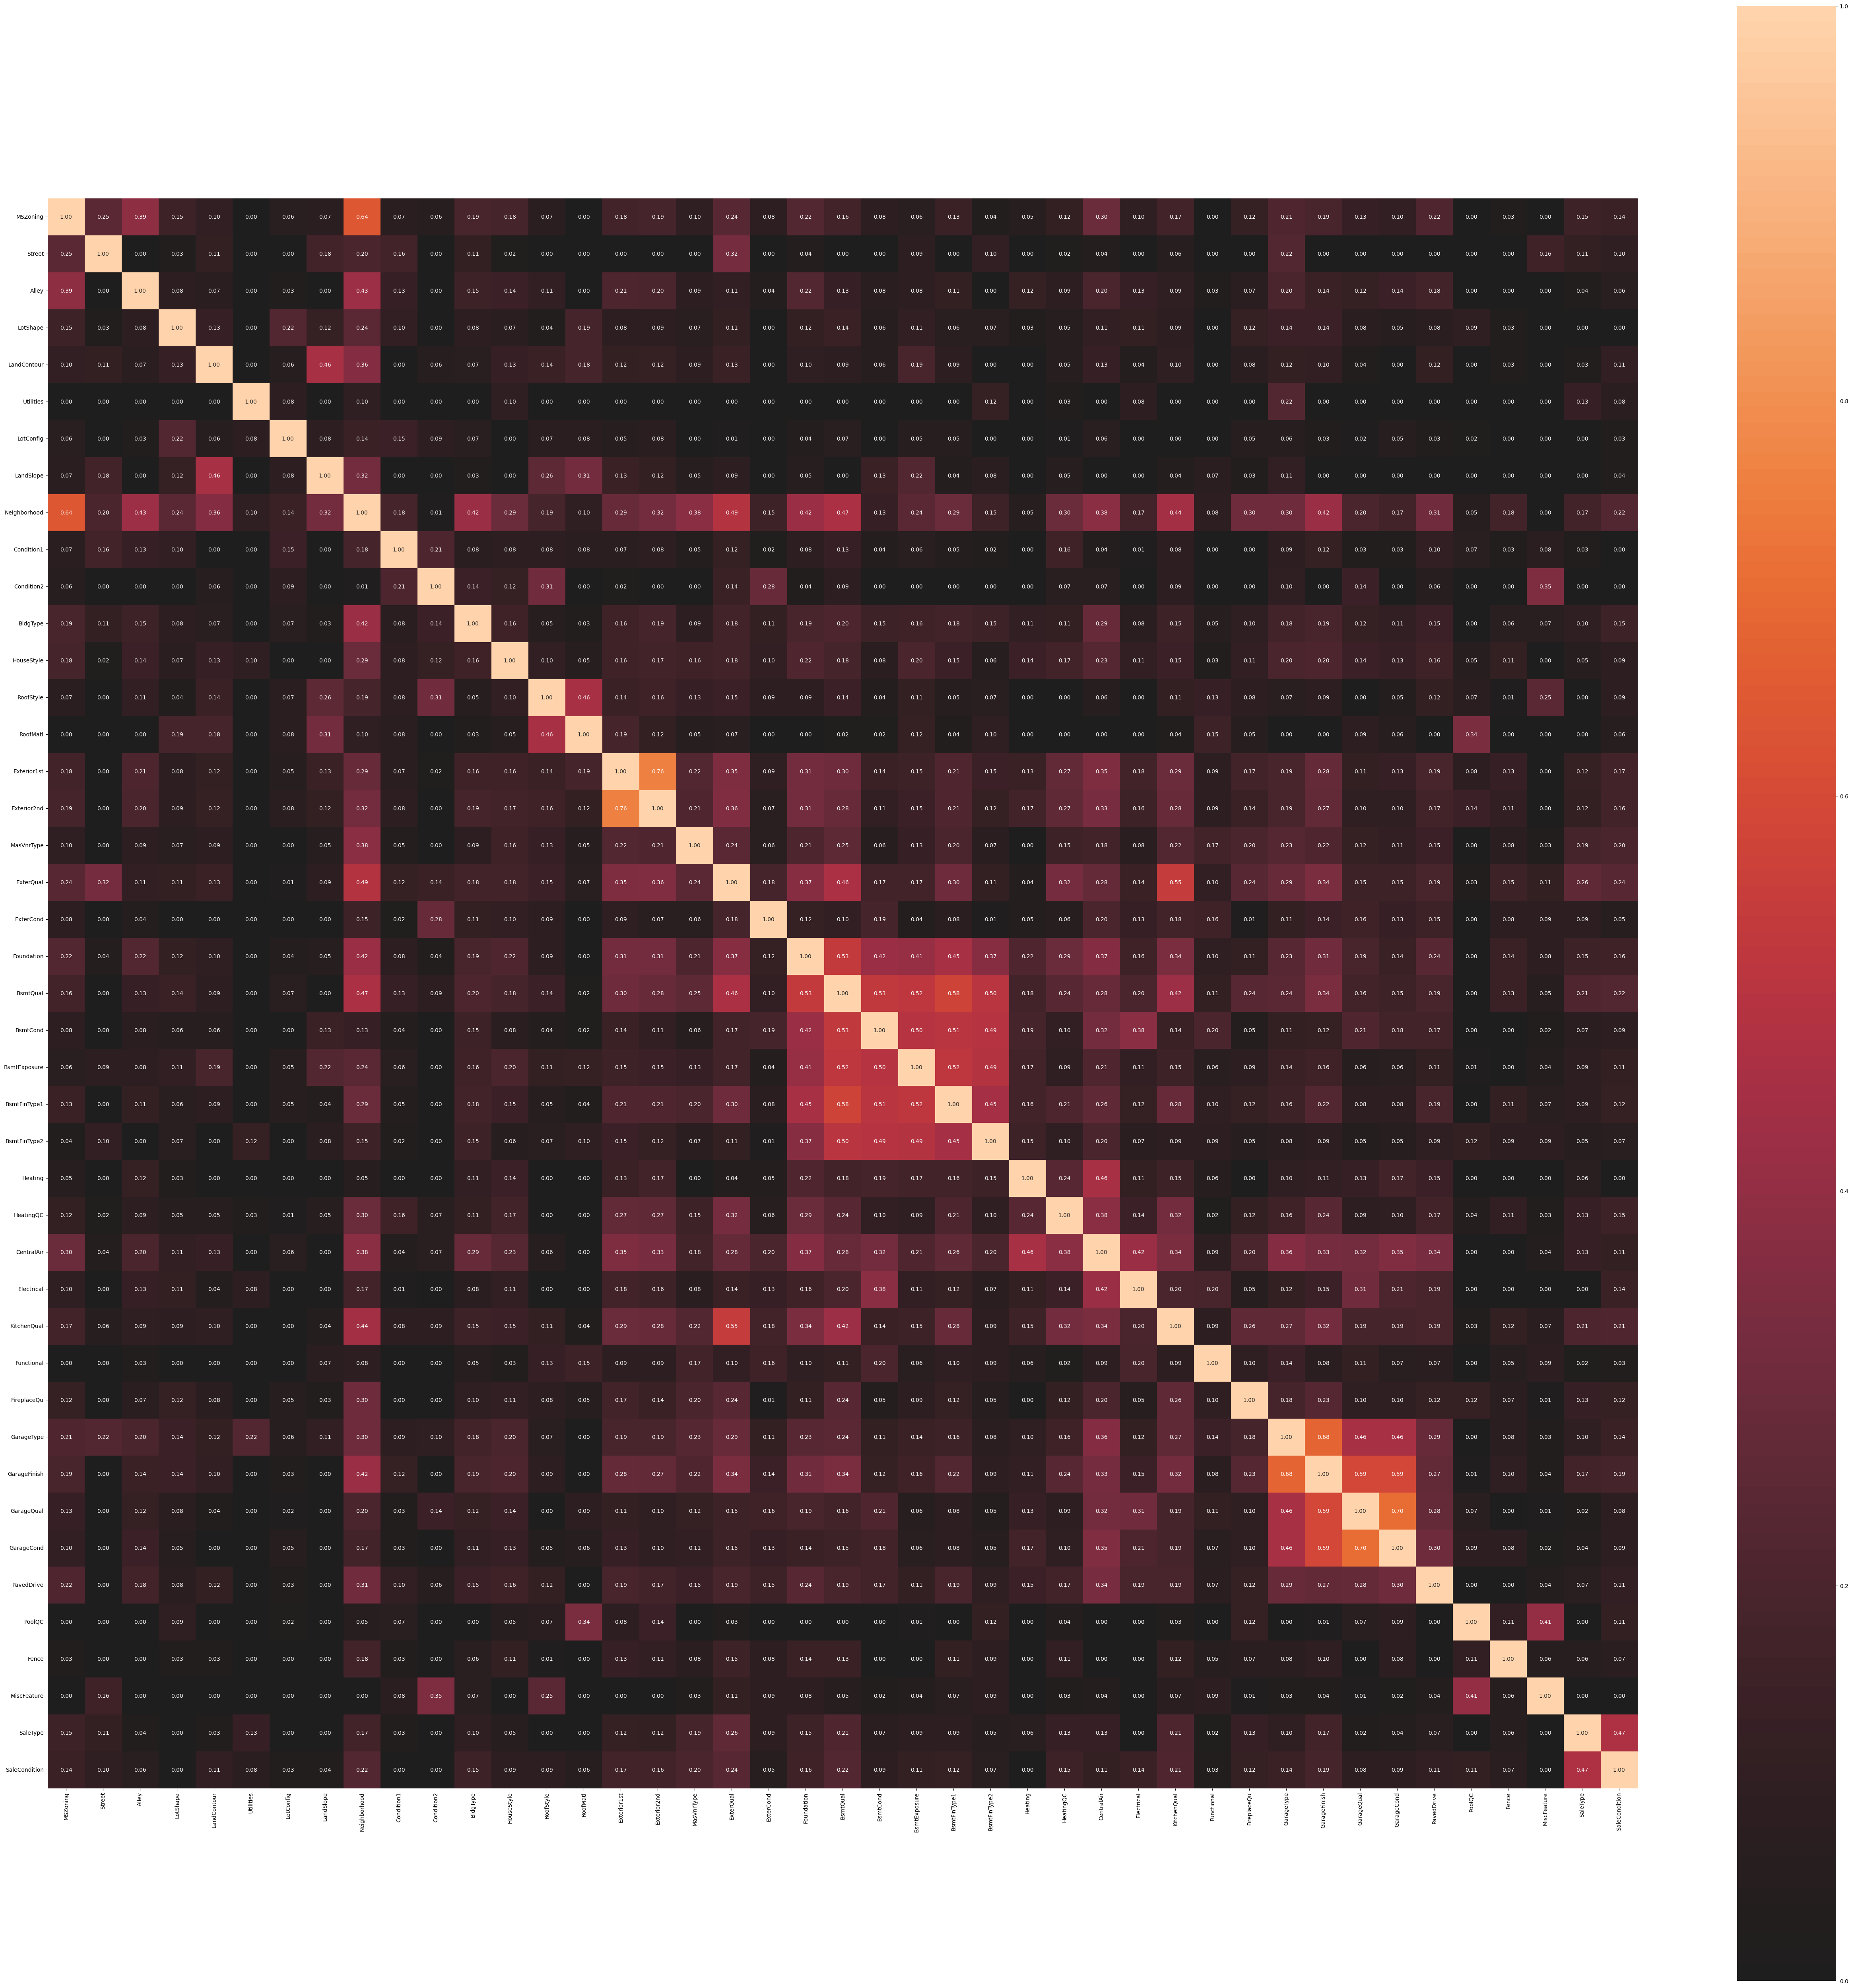

Categorical columns to drop: []


In [14]:
from dython.nominal import associations
# 2) Run associations on categorical dataframe
res = associations(dataset=aNum_df, nominal_columns='all', plot=True)

# 3) Handle return type (depends on dython version)
if isinstance(res, dict) and "corr" in res:
    cat_corr_matrix = res["corr"]
else:
    cat_corr_matrix = res

# 4) Identify highly correlated categorical columns
upper_cat = cat_corr_matrix.where(np.triu(np.ones(cat_corr_matrix.shape), k=1).astype(bool))
to_drop_cat = [c for c in upper_cat.columns if (upper_cat[c] > 0.90).any()]  # threshold

print("Categorical columns to drop:", to_drop_cat)

# 5) Drop them from categorical dataframe
aNum_df_clean = aNum_df.drop(columns=to_drop_cat)

In [15]:
cat_corr_matrix

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
MSZoning,1.000000,0.249384,0.388841,0.152191,0.102102,0.000000,0.063847,0.071793,0.640629,0.071332,...,0.211319,0.193753,0.125518,0.101743,0.218484,0.000000,0.025450,0.000000,0.150903,0.136065
Street,0.249384,1.000000,0.000000,0.033770,0.113834,0.000000,0.000000,0.176221,0.198616,0.164925,...,0.223118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157983,0.110886,0.099458
Alley,0.388841,0.000000,1.000000,0.079801,0.071435,0.000000,0.034874,0.000000,0.428513,0.126371,...,0.198042,0.139992,0.123618,0.140723,0.178929,0.000000,0.000000,0.000000,0.035549,0.064614
LotShape,0.152191,0.033770,0.079801,1.000000,0.126534,0.000000,0.220956,0.118896,0.244025,0.104624,...,0.142843,0.141348,0.075889,0.051170,0.075496,0.094316,0.030195,0.000000,0.000000,0.001923
LandContour,0.102102,0.113834,0.071435,0.126534,1.000000,0.000000,0.060028,0.457249,0.359864,0.000000,...,0.115914,0.101865,0.037273,0.000000,0.116491,0.000000,0.031665,0.000000,0.030262,0.107176
Utilities,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.084991,0.000000,0.095943,0.000000,...,0.218867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130824,0.076153
LotConfig,0.063847,0.000000,0.034874,0.220956,0.060028,0.084991,1.000000,0.079137,0.136832,0.148130,...,0.056687,0.032233,0.015027,0.051661,0.029064,0.023337,0.000000,0.000000,0.000000,0.034114
LandSlope,0.071793,0.176221,0.000000,0.118896,0.457249,0.000000,0.079137,1.000000,0.315128,0.000000,...,0.108851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037628
Neighborhood,0.640629,0.198616,0.428513,0.244025,0.359864,0.095943,0.136832,0.315128,1.000000,0.184954,...,0.298913,0.416955,0.198174,0.172525,0.309300,0.051315,0.175235,0.000000,0.169461,0.219449
Condition1,0.071332,0.164925,0.126371,0.104624,0.000000,0.000000,0.148130,0.000000,0.184954,1.000000,...,0.089318,0.121021,0.028675,0.030468,0.102994,0.069366,0.031231,0.075295,0.033961,0.000000


In [17]:
# 1) How often are they exactly the same?
eq_rate = (train_filled["Exterior1st"] == train_filled["Exterior2nd"]).mean()
print("Exact match rate:", round(eq_rate, 3))

# 2) Cramér’s V between the two columns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

print("Cramér's V:", round(cramers_v(train_filled["Exterior1st"], train_filled["Exterior2nd"]), 3))

Exact match rate: 0.853
Cramér's V: 0.762


After doing a plan corrolation matrix on numeric columns and Craver's test on non categorial, with a threshold of 0.9, there are no columns to drop to be found